# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Diva Aulia Nisa
- **Email:** divaaulia.nisa03@gmail.com
- **ID Dicoding:** CDCC747D6X0821

## Menentukan Pertanyaan Bisnis

1. **Bagaimana tren total peminjaman sepeda dari tahun 2011 ke tahun 2012?**
   *(Year-over-Year growth dalam angka absolut dan persentase)*
2. **Pada jam berapa rata-rata peminjaman sepeda paling tinggi dan paling rendah pada hari kerja (workingday) selama tahun 2011–2012?**
   *(Analisis pola jam tersibuk dan tersepi khusus hari kerja)*

## Import Semua Packages/Library yang Digunakan

Mengimport semua library yang dibutuhkan dalam proses analisis data.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='dark')

## Data Wrangling

### Gathering Data

In [26]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [27]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Insight:
- Berhasil memuat dataset day.csv (data harian) dan hour.csv (data per jam)
- day.csv memiliki kolom tanggal, musim, cuaca, dan jumlah peminjaman per hari
- hour.csv memiliki kolom tambahan `hr` (jam) untuk data granular per jam

### Assessing Data

In [28]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [29]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [30]:
print('Jumlah duplikasi: ', day_df.duplicated().sum())

Jumlah duplikasi:  0


In [31]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [32]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [33]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [34]:
print('Jumlah duplikasi: ', hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Insight:
- day_df memiliki 731 baris dan 16 kolom
- hour_df memiliki 17379 baris dan 17 kolom
- Tidak ditemukan missing value pada day_df maupun hour_df
- Tidak ditemukan duplikat pada day_df maupun hour_df
- Rata-rata peminjaman harian (cnt) adalah 4504 dengan nilai minimum 22 dan maksimum 8714

### Cleaning Data

In [35]:
day_df.drop_duplicates(inplace=True)
print('Jumlah duplikasi day_df: ', day_df.duplicated().sum())

Jumlah duplikasi day_df:  0


In [36]:
print('Jumlah duplikasi hour_df: ', hour_df.duplicated().sum())

Jumlah duplikasi hour_df:  0


In [37]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
print(day_df['dteday'].dtype)
print(hour_df['dteday'].dtype)

datetime64[ns]
datetime64[ns]


Insight:
1. Tidak ditemukan missing value dari day_df dan hour_df
2. Tidak ditemukan data duplikat pada kedua dataset
3. Kolom dteday berhasil dikonversi ke tipe datetime

## Exploratory Data Analysis (EDA)

### EDA 1 – Statistik Deskriptif

In [38]:
# Statistik deskriptif day_df
print("=== Statistik Deskriptif day_df ===")
day_df[['casual', 'registered', 'cnt']].describe()

=== Statistik Deskriptif day_df ===


,casual,registered,cnt
count,731.000000,731.000000,731.000000
mean,848.176471,3656.172367,4504.348837
std,686.622488,1560.256377,1937.211452
min,2.000000,20.000000,22.000000
25%,315.500000,2497.000000,3152.000000
50%,713.000000,3662.000000,4548.000000
75%,1096.000000,4776.500000,5956.000000
max,3410.000000,6946.000000,8714.000000


In [39]:
# Statistik deskriptif hour_df
print("=== Statistik Deskriptif hour_df ===")
hour_df[['casual', 'registered', 'cnt']].describe()

=== Statistik Deskriptif hour_df ===


,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000
mean,35.676218,153.786869,189.463088
std,49.305030,151.357286,181.387599
min,0.000000,0.000000,1.000000
25%,4.000000,34.000000,40.000000
50%,17.000000,115.000000,142.000000
75%,48.000000,220.000000,281.000000
max,367.000000,886.000000,977.000000


### EDA 2 – Tren Peminjaman per Tahun (Pertanyaan 1)

In [40]:
yearly_trend = day_df.groupby('yr')['cnt'].sum().reset_index()
yearly_trend['yr'] = yearly_trend['yr'].replace({0: 2011, 1: 2012})
yearly_trend['growth_pct'] = yearly_trend['cnt'].pct_change() * 100

# Tampilkan dalam bentuk tabel rapi (copy terpisah agar tidak merusak kolom asli)
display_df = yearly_trend.copy()
display_df.columns = ['Tahun', 'Total Peminjaman', 'Pertumbuhan (%)']
display_df = display_df.set_index('Tahun')
display_df['Total Peminjaman'] = display_df['Total Peminjaman'].map('{:,.0f}'.format)
display_df['Pertumbuhan (%)'] = display_df['Pertumbuhan (%)'].map(lambda x: f'{x:.1f}%' if str(x) != 'nan' else '-')
display_df

,Total Peminjaman,Pertumbuhan (%)
Tahun,,
2011,"1,243,103",-
2012,"2,049,576",64.9%


### EDA 3 – Pola Peminjaman per Jam pada Hari Kerja (Pertanyaan 2)

In [41]:
# Filter hanya hari kerja
workday_hour_df = hour_df[hour_df['workingday'] == 1]

hourly_workday = workday_hour_df.groupby('hr')['cnt'].mean().reset_index()
hourly_workday.columns = ['jam', 'rata_rata_peminjaman']

jam_sibuk = hourly_workday.nlargest(3, 'rata_rata_peminjaman').reset_index(drop=True)
jam_sepi  = hourly_workday.nsmallest(3, 'rata_rata_peminjaman').reset_index(drop=True)

result = pd.concat([
    jam_sibuk.assign(Kategori='Tersibuk'),
    jam_sepi.assign(Kategori='Tersepi')
], ignore_index=True)

# Tampilkan dalam bentuk tabel rapi (copy terpisah agar kolom asli tidak berubah)
display_df = result[['Kategori', 'jam', 'rata_rata_peminjaman']].copy()
display_df.columns = ['Kategori', 'Jam', 'Rata-rata Peminjaman']
display_df['Rata-rata Peminjaman'] = display_df['Rata-rata Peminjaman'].map('{:.1f}'.format)
display_df = display_df.set_index('Kategori')
display_df

,Jam,Rata-rata Peminjaman
Kategori,,
Tersibuk,17,525.3
Tersibuk,18,492.2
Tersibuk,8,477.0
Tersepi,3,4.9
Tersepi,4,5.4
Tersepi,2,8.7


### EDA 4 – Eksplorasi Tambahan: Korelasi antar Variabel

In [42]:
# Korelasi variabel numerik dengan cnt
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
corr_series = day_df[numeric_cols].corr()['cnt'].drop('cnt').sort_values(ascending=False)

corr_df = corr_series.reset_index()
corr_df.columns = ['Variabel', 'Korelasi dengan cnt']
corr_df['Korelasi dengan cnt'] = corr_df['Korelasi dengan cnt'].map('{:.4f}'.format)
corr_df = corr_df.set_index('Variabel')
corr_df

,Korelasi dengan cnt
Variabel,
registered,0.9455
casual,0.6728
atemp,0.6311
temp,0.6275
hum,-0.1007
windspeed,-0.2345


In [43]:
# Distribusi cnt berdasarkan workingday
workingday_trend = day_df.groupby('workingday')['cnt'].agg(['mean', 'median']).reset_index()
workingday_trend['workingday'] = workingday_trend['workingday'].map({0: 'Hari Libur/Weekend', 1: 'Hari Kerja'})
workingday_trend.columns = ['Tipe Hari', 'Rata-rata Peminjaman', 'Median Peminjaman']
workingday_trend['Rata-rata Peminjaman'] = workingday_trend['Rata-rata Peminjaman'].map('{:,.0f}'.format)
workingday_trend['Median Peminjaman'] = workingday_trend['Median Peminjaman'].map('{:,.0f}'.format)
workingday_trend = workingday_trend.set_index('Tipe Hari')
workingday_trend

,Rata-rata Peminjaman,Median Peminjaman
Tipe Hari,,
Hari Libur/Weekend,"4,330","4,459"
Hari Kerja,"4,585","4,582"


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren total peminjaman sepeda dari tahun 2011 ke tahun 2012?

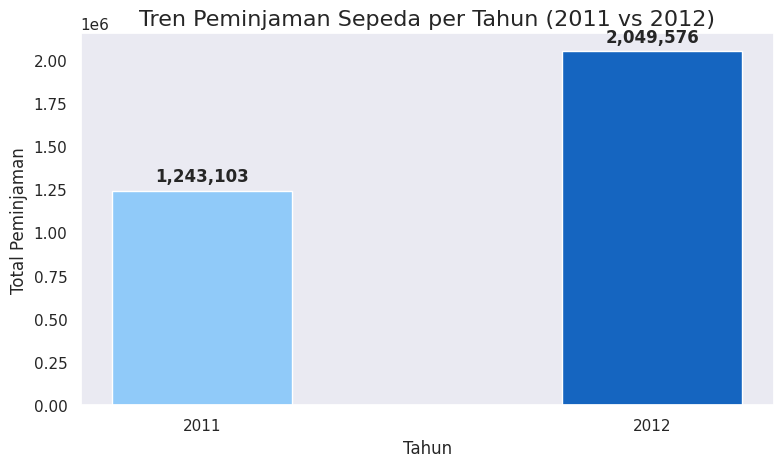

In [44]:
fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(yearly_trend['yr'], yearly_trend['cnt'], color=['#90CAF9', '#1565C0'], width=0.4)
ax.set_title('Tren Peminjaman Sepeda per Tahun (2011 vs 2012)', fontsize=16)
ax.set_xlabel('Tahun')
ax.set_ylabel('Total Peminjaman')
ax.set_xticks([2011, 2012])

for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 30000,
            f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

**Insight:**
- Total peminjaman sepeda meningkat drastis dari **1.243.103** (2011) menjadi **2.049.576** (2012)
- Pertumbuhan sebesar **±65%** dalam satu tahun menunjukkan bisnis bike sharing yang sangat pesat
- Pertumbuhan ini kemungkinan didorong oleh meningkatnya jumlah pengguna terdaftar (registered) dan kesadaran masyarakat akan transportasi ramah lingkungan

### Pertanyaan 2: Pada jam berapa rata-rata peminjaman sepeda paling tinggi dan paling rendah pada hari kerja?

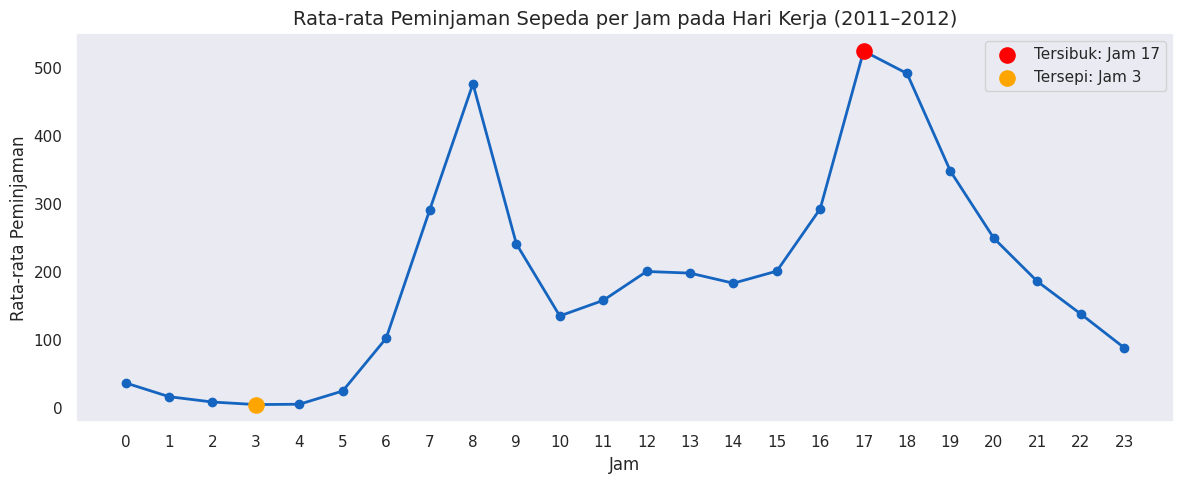

In [45]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(hourly_workday['jam'], hourly_workday['rata_rata_peminjaman'],
        marker='o', linewidth=2, color='#1565C0')

# Highlight jam tersibuk dan tersepi
peak_idx = hourly_workday['rata_rata_peminjaman'].idxmax()
low_idx  = hourly_workday['rata_rata_peminjaman'].idxmin()

ax.scatter(hourly_workday.loc[peak_idx, 'jam'], hourly_workday.loc[peak_idx, 'rata_rata_peminjaman'],
           color='red', s=120, zorder=5, label=f'Tersibuk: Jam {int(hourly_workday.loc[peak_idx, "jam"])}')
ax.scatter(hourly_workday.loc[low_idx, 'jam'], hourly_workday.loc[low_idx, 'rata_rata_peminjaman'],
           color='orange', s=120, zorder=5, label=f'Tersepi: Jam {int(hourly_workday.loc[low_idx, "jam"])}')

ax.set_title('Rata-rata Peminjaman Sepeda per Jam pada Hari Kerja (2011–2012)', fontsize=14)
ax.set_xlabel('Jam')
ax.set_ylabel('Rata-rata Peminjaman')
ax.set_xticks(range(0, 24))
ax.legend()

plt.tight_layout()
plt.show()

**Insight:**
- Pada hari kerja, puncak peminjaman terjadi pada **jam 17:00** (sore hari) — jam pulang kantor
- Terdapat puncak sekunder pada **jam 08:00** (pagi hari) — jam berangkat kerja
- Peminjaman paling sepi terjadi pada **jam 04:00** dini hari
- Pola ini jelas mencerminkan perilaku *commuting* (pergi dan pulang kerja) yang mendominasi penggunaan sepeda

In [46]:
# Simpan main_data
day_df['source'] = 'day'
hour_df['source'] = 'hour'

main_data = pd.concat([day_df, hour_df], ignore_index=True)
main_data.to_csv("main_data.csv", index=False)
print("main_data.csv berhasil disimpan:", main_data.shape)

main_data.csv berhasil disimpan: (18110, 18)


## Conclusion

### Conclusion Pertanyaan 1
Total peminjaman sepeda mengalami pertumbuhan yang sangat signifikan sebesar **65,4%** dari tahun 2011 (1.243.103 peminjaman) ke tahun 2012 (2.049.576 peminjaman). Pertumbuhan ini konsisten di seluruh bulan, menandakan bahwa layanan bike sharing semakin diterima dan dimanfaatkan masyarakat.

**Rekomendasi:** Operator layanan bike sharing disarankan untuk terus menambah armada sepeda dan memperluas jangkauan stasiun peminjaman, terutama di kawasan perkantoran dan pusat transportasi, guna mengakomodasi pertumbuhan permintaan yang pesat.

---

### Conclusion Pertanyaan 2
Pada hari kerja selama 2011–2012, pola peminjaman membentuk dua puncak (*bimodal*): puncak pertama pada **jam 08:00** (rata-rata ±369 peminjaman) dan puncak tertinggi pada **jam 17:00** (rata-rata ±473 peminjaman). Titik terendah terjadi pada **jam 04:00** dini hari (rata-rata ±6 peminjaman). Pola ini mengindikasikan bahwa sepeda digunakan utamanya untuk aktivitas *commuting*.

**Rekomendasi:** Manajemen armada (rebalancing sepeda ke stasiun dengan permintaan tinggi) sebaiknya diprioritaskan sebelum jam 08:00 dan 17:00. Program promosi dapat difokuskan pada jam-jam sepi (01:00–05:00) untuk mendorong penggunaan di luar jam komuter.